## Hierarchical Clustering with Python - Mall Customers
The aim of this problem is to segment the customers of a store based on their annual income and their spending score.

* Annual Income (k$): annual income of the customers
* Spending Score (1-100): spending score of the customers

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, lets import our data and take a look at first couple rows:

In [5]:
dataset = pd.read_csv("Mall_Customers.csv")

In [6]:
dataset.head(4)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
CustomerID                200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


In [8]:
dataset.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


Our variables are in similar scale, so we don't really need to do scaling.

Let's take a look at the relationship between these two variables through a scatter plot

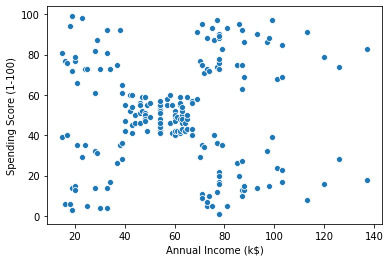

In [9]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=dataset)

In [10]:
X = dataset.drop("CustomerID",axis=1)

In [11]:
X.head(4)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77


In [12]:
import scipy.cluster.hierarchy as sch

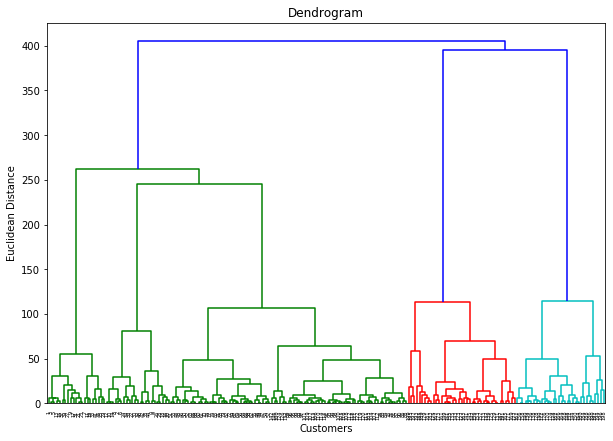

In [13]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

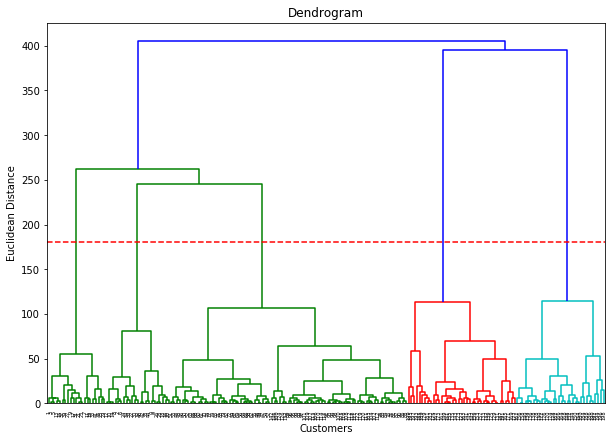

In [14]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.axhline(y=180,color="r",linestyle="--")
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [20]:
slht_score = []
for i in range(2, 20):
    hierar = AgglomerativeClustering(n_clusters = i, linkage="ward",affinity="euclidean")
    pred = hierar.fit_predict(X)
    slht_score.append(metrics.silhouette_score(X, pred))

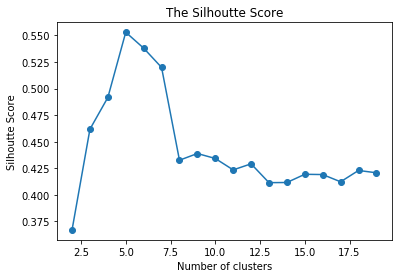

In [21]:
plt.plot(range(2, 20), slht_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward",affinity="euclidean")

In [15]:
pred= hc.fit_predict(X)

In [16]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [17]:
dataset['cluster']=pred

In [18]:
dataset.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),cluster
0,1,15,39,4
1,2,15,81,3
2,3,16,6,4
3,4,16,77,3
4,5,17,40,4


In [19]:
dataset["cluster"].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: cluster, dtype: int64

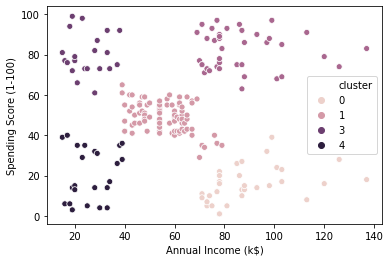

In [20]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=dataset,hue="cluster")